In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

Loading the Iris Dataset

In [53]:
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [64]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Importing Kmeans model

In [54]:
from sklearn.cluster import KMeans

Calculating sum of squared error for 1 to 20 number of clusters

In [55]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=10)
    kmeans.fit(df)
    labels=kmeans.predict(df)
    sse[k] = kmeans.inertia_ 

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\skl

In [56]:
sse


{1: 681.3706,
 2: 152.3479517603579,
 3: 78.85144142614601,
 4: 57.22847321428571,
 5: 46.44618205128205,
 6: 39.066035353535355,
 7: 34.29822966507177,
 8: 30.328666385214376,
 9: 28.146938933873145,
 10: 26.315045164595205,
 11: 24.613279418902994,
 12: 22.893035621034194,
 13: 21.617274269847805,
 14: 20.85742606808396,
 15: 19.256515873015875,
 16: 17.92917161004518,
 17: 17.444837301587302,
 18: 16.95410283344107,
 19: 15.517783110164693}

Applying Elbow Method

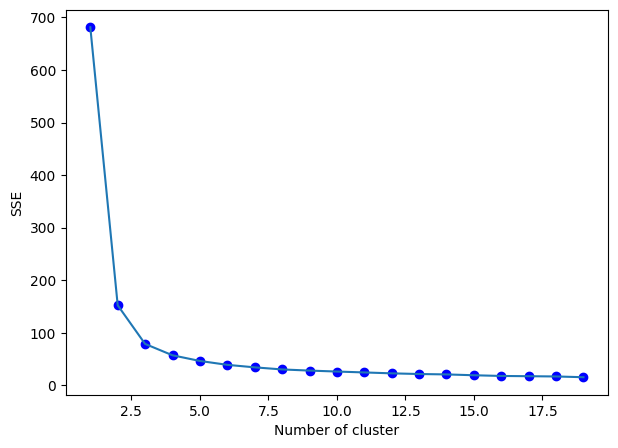

In [57]:
#Elbow Method
plt.figure(figsize=(7,5))
plt.plot(list(sse.keys()), list(sse.values()),'bo')
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

From above plot it is clearly seen that the optimum number of clusters would be 3

Applting kmeans algorithms for 3 clusters

In [58]:
kmeans = KMeans(n_clusters=3,max_iter=1000000)
kmeans.fit(df)
labels_pred = kmeans.predict(df)
labels_pred

c:\Program Files\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

beacause there are 4 fatures in our iris dataset so it can not be visualised so for visualizing purpose we are taking 'petal length (cm)', 'petal width (cm)' as the only features

In [59]:
feature=df[['petal length (cm)', 'petal width (cm)']]
feature.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


visualizing the data before clustering

Text(0, 0.5, 'petal length (cm)')

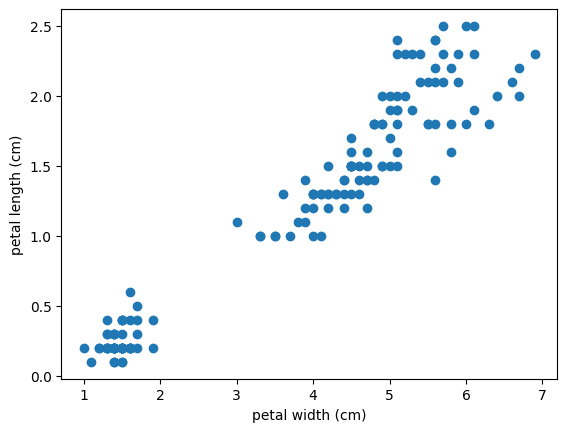

In [60]:
plt.scatter(feature['petal length (cm)'],feature['petal width (cm)'])
plt.xlabel('petal width (cm)')
plt.ylabel('petal length (cm)')

cluster centers

In [61]:
kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

adding an extra column in features dataframe

In [62]:
feature['pred']=labels_pred
feature

C:\Users\91779\AppData\Local\Temp\ipykernel_32252\3557267879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature['pred']=labels_pred


,petal length (cm),petal width (cm),pred
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,1
147,5.2,2.0,2
148,5.4,2.3,2


visualizing the data after applying clustering where the * are the cluster centers

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


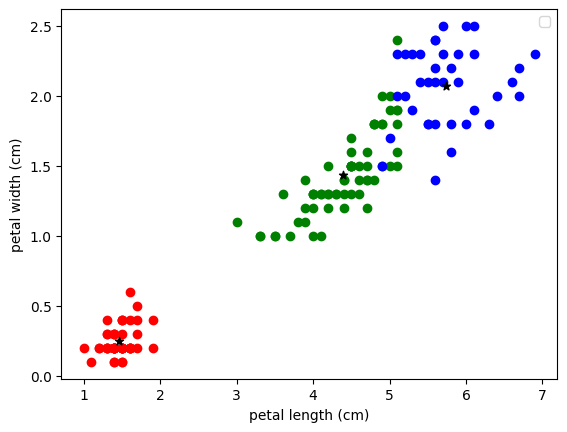

In [63]:
feature1=feature[feature.pred==0]
feature2=feature[feature.pred==1]
feature3=feature[feature.pred==2]

plt.scatter(feature1['petal length (cm)'],feature1['petal width (cm)'],color='red')
plt.scatter(feature2['petal length (cm)'],feature2['petal width (cm)'],color='green')
plt.scatter(feature3['petal length (cm)'],feature3['petal width (cm)'],color='blue')
plt.scatter(kmeans.cluster_centers_[:,2],kmeans.cluster_centers_[:,3],color='black',marker='*')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()